# Imports

In [41]:
import os
import pickle
import joblib
from matplotlib import pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from skimage import color
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Exploring the Dataset

In [2]:
train_dir = 'dataset//train'
test_dir = 'dataset//test1'

In [3]:
num_train_files = 0
num_test_files = 0

for root, dirs, files in os.walk(train_dir):
        num_train_files = num_train_files + len(files)

for root, dirs, files in os.walk(test_dir):
        num_test_files = num_test_files + len(files)

    
print (f'Size of Training data: {num_train_files}')
print (f'Size of Testing data: {num_test_files}')

Size of Training data: 25000
Size of Testing data: 12500


In [4]:
filenames = os.listdir(train_dir)

catnames = [fname for fname in filenames
             if 'cat' in fname]

dognames = [fname for fname in filenames
            if 'dog' in fname]

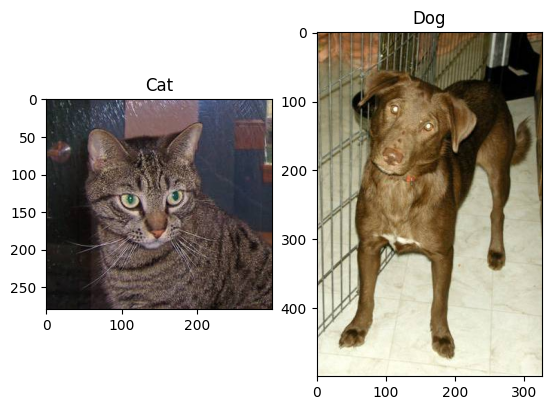

In [5]:
cat_img = cv2.imread(f'dataset//train//{catnames[1]}')
dog_img = cv2.imread(f'dataset//train//{dognames[1]}')

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Cat')
ax2.imshow(cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB))
ax2.set_title('Dog')
plt.show()


# Preprocessing

In [5]:
print(len(catnames))
print(len(dognames))

12500
12500


In [6]:
cat_imgs = []
for name in catnames:
    cat_imgs.append(cv2.imread(f'dataset//train//{name}'))

dog_imgs = []
for name in dognames:
    dog_imgs.append(cv2.imread(f'dataset//train//{name}'))


In [7]:
print(f'Number of Dog training Images: {len(dog_imgs)}')
print(f'Number of Cat training Images: {len(cat_imgs)}')

Number of Dog training Images: 12500
Number of Cat training Images: 12500


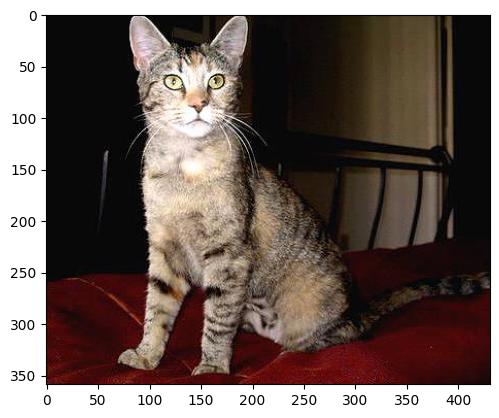

In [9]:
plt.imshow(cv2.cvtColor(cat_imgs[5], cv2.COLOR_BGR2RGB))

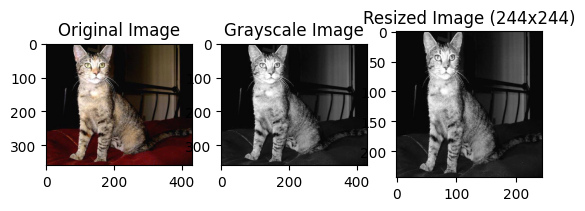

In [10]:
# Choose a sample Img
img_path = f'dataset//train//{catnames[5]}'
img = cat_imgs[5]

# Convert image to gray scalling
grayscale_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize image
resized_img = cv2.resize(grayscale_img, (244, 244))

# Create a figure with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Display original image (assuming BGR format)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')

# Display grayscale image
ax2.imshow(grayscale_img, cmap='gray')
ax2.set_title('Grayscale Image')

# Display resized image
ax3.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))  # Convert to RGB before display
ax3.set_title('Resized Image (244x244)')

plt.show()

In [11]:
print(f'Original image shape:{img.shape}')
print(f'GrayScaled image shape:{grayscale_img.shape}')
print(f'Resized image shape:{resized_img.shape}')

Original image shape:(359, 431, 3)
GrayScaled image shape:(359, 431)
Resized image shape:(244, 244)


In [12]:
print(resized_img)

[[ 8  8  8 ...  8  8  8]
 [ 8  8  8 ...  8  8  8]
 [ 8  8  8 ...  8  8  8]
 ...
 [44 46 39 ... 13 13 13]
 [34 40 40 ... 13 13 13]
 [49 52 39 ... 11 11 11]]


### Flatten

In [13]:
flattened_img = resized_img.flatten()
print(flattened_img.shape)
flattened_img

(59536,)


array([ 8,  8,  8, ..., 11, 11, 11], dtype=uint8)

### Normalization

In [14]:
# Normalize pixel values (0 to 1)
normalized_img = flattened_img.astype('float32') / 255.0
normalized_img

array([0.03137255, 0.03137255, 0.03137255, ..., 0.04313726, 0.04313726,
       0.04313726], dtype=float32)

## Preprocessing Function

In [24]:
def preprocess_img(img):
    # Read image in grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize image
    img = cv2.resize(img, (64, 64))

    # Normalize pixel values (0 to 1)
    img = img.astype('float32') / 255.0

    # Return image in a flastten format
    return img.flatten()

In [16]:
# Apply preprocessing to data
preprocess_dogs = []
preprocess_cats = []

for img in dog_imgs:
    img = preprocess_img(img)
    preprocess_dogs.append(img)

for img in cat_imgs:
    img = preprocess_img(img)
    preprocess_cats.append(img)

# Grid Search

### Create Labels
* 1 FOR Dog
* 0 FOR Cat

In [17]:
dogs_labels = [1] * len(preprocess_dogs)
cats_labels = [0] * len(preprocess_cats)

### prepare data for Grid Search

In [18]:
data = np.array(preprocess_dogs + preprocess_cats)
labels = np.array(dogs_labels + cats_labels)

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state= 42)

In [53]:
# Randomly select 100 indices from the data
indices = np.random.choice(len(data), 500, replace=False)

# Create a new sample of data and labels using the selected indices
sample_data = data[indices]
sample_labels = labels[indices]

In [12]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': [0.01, 0.1, 1],  # Kernel coefficient (for 'rbf' and 'poly')
    #'degree': [2, 3, 4]  # Polynomial degree (for 'poly')
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

In [55]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [56]:
best_params

{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}

# SVM Model Training

In [ ]:
# Sample 1000 images for training
sample_size = 10000
cat_sample = cat_imgs[:sample_size // 2]
dog_sample = dog_imgs[:sample_size // 2]

# Preprocess the sampled images
X = []
y = []

for img in cat_sample:
  X.append(preprocess_img(img))
  y.append(0)  # Label cats as 0

for img in dog_sample:
  X.append(preprocess_img(img))
  y.append(1)  # Label dogs as 1

X = np.array(X)
y = np.array(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Create SVM model with specified parameters
svm_model = SVC(C=0.1, gamma=0.01, kernel='poly')

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.01, kernel='poly')

# Testing the Accurrcy

In [37]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 59.65%


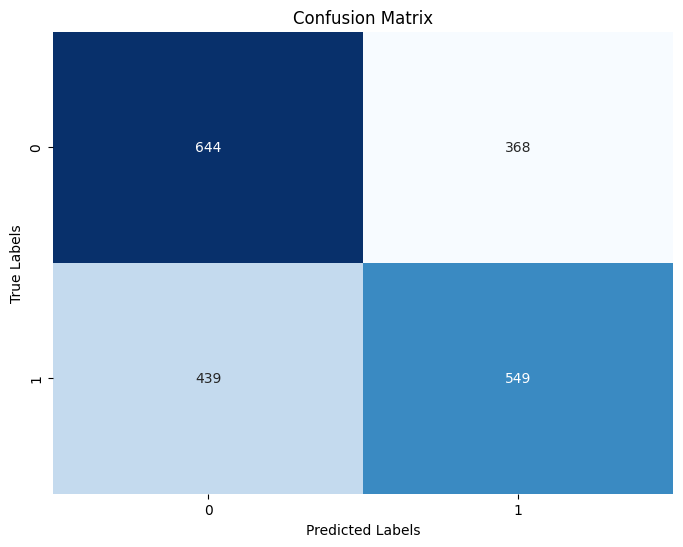

              precision    recall  f1-score   support

           0       0.59      0.64      0.61      1012
           1       0.60      0.56      0.58       988

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



In [42]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

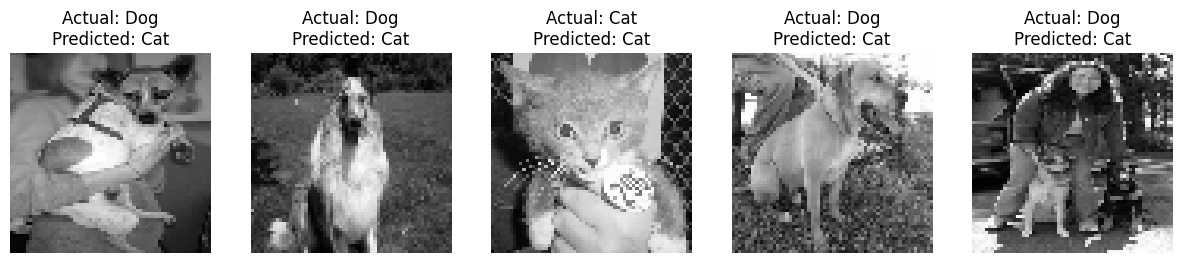

In [43]:
# prompt: visulize sample imgs with with accual label and predicted label  

import matplotlib.pyplot as plt
import numpy as np
# Visualize sample images with actual and predicted labels
num_samples_to_visualize = 5
sample_indices = np.random.choice(len(X_test), num_samples_to_visualize, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')
    actual_label = "Dog" if y_test[idx] == 1 else "Cat"
    predicted_label = "Dog" if y_pred[idx] == 1 else "Cat"
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.show()


In [44]:
# Save the model to a file
joblib.dump(svm_model, 'dogVScat_model.joblib')

['dogVScat_model.joblib']